# Given medical information, we need to find that a patient has cancer or not

**Class 2** : **Benign - means not Cancerour**


**Class 4** : **Malignant - means Cancerous**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df.iloc[:,1].head()

0    5
1    5
2    3
3    6
4    4
Name: clump_thickness, dtype: int64

In [3]:
# Reading it from CSV
df = pd.read_csv('cancer_data.csv')

# To save data into your system
# df.to_csv('cvd.csv', index = False)

In [4]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df['class'].unique() # 2 - Benign , 4 - Maliglant

array([2, 4], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [8]:
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
int(df.bare_nuclei.mode()[0])

1

In [11]:
df.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [12]:
df['bare_nuclei'].replace('?', df.bare_nuclei.mode()[0] )

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object

In [4]:
df['bare_nuclei'] = df['bare_nuclei'].apply(lambda x: int(df.bare_nuclei.mode()[0]) if x=='?' else int(x))

In [14]:
df["bare_nuclei"].replace({"?": 1}).head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [15]:
# np.where(condition, desired o/p, regular o/p)

np.where(df.bare_nuclei == '?', int(df.bare_nuclei.mode()[0]), df.bare_nuclei).astype(int)[:30]

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([ 1, 10,  2,  4,  1, 10, 10,  1,  1,  1,  1,  1,  3,  3,  9,  1,  1,
        1, 10,  1, 10,  7,  1,  1,  1,  7,  1,  1,  1,  1])

In [ ]:
df['bare_nuclei'].apply(lambda x:x.replace('?','1')).head()

In [ ]:
df.loc[df.bare_nuclei == '?', 'bare_nuclei'].index

# df.bare_nuclei.loc[df.bare_nuclei == '?']


In [ ]:
df.bare_nuclei.loc[[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617]] = int(df.bare_nuclei.mode()[0])

In [16]:
df.bare_nuclei.head(26)

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     1
24     1
25     7
Name: bare_nuclei, dtype: int64

In [ ]:
df.drop(  df.bare_nuclei.loc[df.bare_nuclei == '?'].index    ).head()

In [ ]:
df2 = df[df.bare_nuclei != '?']

In [ ]:
df['bare_nuclei'].unique()

In [ ]:
# df.bare_nuclei = df.bare_nuclei.astype(int) # cOnverted to Integer

In [5]:
df.dtypes

id                        int64
clump_thickness           int64
uniform_cell_size         int64
uniform_cell_shape        int64
marginal_adhesion         int64
single_epithelial_size    int64
bare_nuclei               int64
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

In [18]:
df.corr() # command for finding the coorelation among variables

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [19]:
y1 = df['class'].apply(lambda x: 'cancer' if x ==4 else 'non_cancer')

In [20]:
X = df.drop(['class','mitoses'], axis = 1) # We have defined the Training Data as we have to predict Class for Cancer, so we removed it 
y = df['class'] # Y is to Be predicted, Target so it is kept seperatly from the data

'''
# Split datasets into testing and training set using TRAIN_TEST_SPIT - inbuilt library from sklearn

# Test_size = 0.2 means keeping 20% of randomly selected data for testing out model and keeping rest 80% for Training the model

# Random_State - random_state parameter is used for initializing the internal random number generator, 
                 #which will decide the splitting of data into train and test indices in your case

# SKLEARN : Is the Parent Library in Python where all the Machine learing algorithms are present

'''

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y1, 
                                                    test_size = 0.3, 
                                                    random_state = 2020)  

In [21]:
display(y_test.head(), X_test.head(),' TRAINING DATA ', y_train.head(), X_train.head())

103        cancer
322    non_cancer
652    non_cancer
35     non_cancer
491        cancer
Name: class, dtype: object

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli
103,1168359,8,2,3,1,6,3,7,1
322,733639,3,1,1,1,2,1,3,1
652,1324572,5,1,1,1,2,1,2,2
35,1079304,2,1,1,1,2,1,2,1
491,1119189,5,8,9,4,3,10,7,1


' TRAINING DATA '

413    non_cancer
22     non_cancer
111        cancer
208    non_cancer
121    non_cancer
Name: class, dtype: object

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli
413,1238915,5,1,2,1,2,1,3,1
22,1056784,3,1,1,1,2,1,2,1
111,1171845,8,6,4,3,5,9,3,1
208,1218860,1,1,1,1,1,1,3,1
121,1174057,4,2,1,1,2,2,3,1


In [ ]:
print('X_train',len(X_train))
print('X_test', len(X_test))
print('y_train',len(y_train))
print('y_test', len(y_test))

In [22]:
X_test.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli'],
      dtype='object')

In [23]:
X_train.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli'],
      dtype='object')

In [25]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# To all available distance metrices for finding the distance
print(sorted(sklearn.neighbors.VALID_METRICS['brute']))



clf = KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')



['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'cosine', 'dice', 'euclidean', 'hamming', 'haversine', 'jaccard', 'kulsinski', 'l1', 'l2', 'mahalanobis', 'manhattan', 'matching', 'minkowski', 'nan_euclidean', 'precomputed', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'wminkowski', 'yule']


In [26]:
# For training the model on training data
clf.fit(X_train.drop('id',1), y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
y_pred = clf.predict( X_test.drop('id',1)  )

In [ ]:
X_test.id.head(5)

In [28]:
y_pred[:7]

array(['cancer', 'non_cancer', 'non_cancer', 'non_cancer', 'cancer',
       'non_cancer', 'non_cancer'], dtype=object)

In [30]:
pr = pd.DataFrame(y_pred[:5], columns=['Pred'], index = X_test.head(5).index)
pr

,Pred
103,cancer
322,non_cancer
652,non_cancer
35,non_cancer
491,cancer


In [31]:
pd.concat([X_test.id.head(5), pr['Pred'], y_test.head(5)],1)

,id,Pred,class
103,1168359,cancer,cancer
322,733639,non_cancer,non_cancer
652,1324572,non_cancer,non_cancer
35,1079304,non_cancer,non_cancer
491,1119189,cancer,cancer


In [ ]:
y_test.head(6)

In [34]:
y_train_pred = clf.predict(X_train.drop('id', 1))


In [35]:
len(y_train_pred)


489

In [38]:
# trial method to check training done properly or not
pd.concat([X_train.id, y_train, pd.Series(y_train_pred, index = X_train.index)],1)
# pd.concat( [X_test.id, y_test,pd.Series(y_pred, index = X_test.index) ],1)


,id,class,0
413,1238915,non_cancer,non_cancer
22,1056784,non_cancer,non_cancer
111,1171845,cancer,cancer
208,1218860,non_cancer,non_cancer
121,1174057,non_cancer,non_cancer
...,...,...,...
637,1275807,non_cancer,non_cancer
91,1156948,non_cancer,non_cancer
630,1225382,non_cancer,non_cancer
323,733823,cancer,cancer


In [55]:
# prediction for single sample
singlee = X_test.drop('id', 1).iloc[15]
singlee

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           1
normal_nucleoli           1
Name: 678, dtype: int64

In [59]:
sing = clf.predict([X_test.drop('id', 1).iloc[15]])
sing


array(['non_cancer'], dtype=object)

In [61]:
X_test.iloc[15].id

1368273

In [68]:
y_test.iloc[15]

'non_cancer'

In [84]:
pd.concat([pd.Series(X_test.iloc[15].id), pd.Series( y_test.iloc[15]) ,pd.Series(sing) ],1)

,0,1,2
0,1368273,non_cancer,non_cancer


# Predicting Probability

In [ ]:
y_test.head()

In [39]:
# to check which class the algorithm used
clf.classes_

array(['cancer', 'non_cancer'], dtype=object)

In [43]:
prob = clf.predict_proba(X_test.drop('id', 1))
# prob

In [86]:
df1 = pd.DataFrame(prob, columns=clf.classes_, index=X_test.index)
df1.head()

,cancer,non_cancer
103,1.0,0.0
322,0.0,1.0
652,0.0,1.0
35,0.0,1.0
491,0.8,0.2


In [88]:
df_res = pd.DataFrame(X_test).copy()

df_res['y_test'], df_res['y_pred']   = y_test, y_pred

df_res['Proba_2'], df_res['Proba_4'] = df1['cancer'], df1['non_cancer']

df_res[ df_res['y_test'] != df_res['y_pred'] ]

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,y_test,y_pred,Proba_2,Proba_4
356,859164,5,3,3,1,3,3,3,3,cancer,non_cancer,0.4,0.6
489,1084139,6,3,2,1,3,4,4,1,cancer,non_cancer,0.2,0.8
691,695091,5,10,10,5,4,5,4,4,cancer,non_cancer,0.4,0.6
1,1002945,5,4,4,5,7,10,3,2,non_cancer,cancer,1.0,0.0
348,832226,3,4,4,10,5,1,3,3,cancer,non_cancer,0.2,0.8
296,616240,5,3,4,3,4,5,4,7,non_cancer,cancer,1.0,0.0


In [92]:
# shape of failure
df_res.loc[df_res['y_test'] != df_res['y_pred']].shape

(6, 13)

# Testing Accuracy

In [93]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [94]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_pred))

Accuracy_score Testing Data:  97.14

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

      cancer       0.97      0.95      0.96        73
  non_cancer       0.97      0.99      0.98       137

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[ 69   4]
 [  2 135]]


# Training Accuracy 

In [96]:
print('Accuracy_score Training Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))
print('\n','Classification_report Training Data: ','\n','\n',classification_report(y_train, y_train_pred))

Accuracy_score Training Data:  97.55

 Classification_report Training Data:  
 
               precision    recall  f1-score   support

      cancer       0.94      0.99      0.97       168
  non_cancer       1.00      0.97      0.98       321

    accuracy                           0.98       489
   macro avg       0.97      0.98      0.97       489
weighted avg       0.98      0.98      0.98       489



In [97]:
confusion_matrix(y_train, y_train_pred)

array([[167,   1],
       [ 11, 310]], dtype=int64)

# GridSearch CV

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
p = {'n_neighbors' : [3,5,20,21,22,31],
     'metric' : ['manhattan','euclidean']
    }

model = GridSearchCV(clf,
                     param_grid= p,
                     cv = 5) # K fold Cross Validation and 10 is the number of folds you are dividing your data into,
                     verbose = 10) # verbosity controls your display messages

model.fit(X_train, y_train)
grid_pred = model.predict(X_test)

print('Best Params: ',model.best_params_)
print(np.round((model.best_score_)*100,2 ))

Best Params:  {'metric': 'manhattan', 'n_neighbors': 21}
67.49


In [ ]:
np.where(df_res['y_test'] != df_res['y_pred'])

In [106]:
np.where(grid_pred != df_res['y_pred'].values)

(array([  0,   7,   8,  12,  13,  16,  18,  19,  26,  28,  30,  32,  33,
         34,  36,  38,  42,  49,  50,  52,  53,  55,  57,  60,  61,  65,
         66,  74,  82,  91,  92,  99, 101, 105, 109, 115, 116, 117, 118,
        119, 123, 125, 127, 128, 129, 137, 138, 139, 141, 142, 154, 155,
        157, 161, 162, 164, 165, 166, 168, 169, 173, 178, 179, 182, 185,
        189, 191, 194, 196, 200, 202, 203, 209], dtype=int64),)

In [ ]:
### FOR FINDING BEST VALUE OF K - N_NEIGHBORS

# use loop --- use diferent values of K- n neighbors --
# get the model trained using the above defined N neighbors
# see the missclassified cases and aggregate them

# then plot those misclassified cases w.r.t the number neighbors

# Example :
# x axis - neighbors = 3  --> misclssified cases - 5
# x axis - neighbors = 5  --> misclssified cases - 2
# x axis - neighbors = 7  --> misclssified cases - 3

# from given Missclassified cases find your own optimal vale of K- n neighbors == having least number of Misclassified cases


In [98]:
pred = []

for i in range(3,15,2):
    knn = KNeighborsClassifier(n_neighbors=i) # defining classifier with diff. vlue of K
    knn.fit(X_train,y_train)
    pred_data = knn.predict(X_test)
    pred.append(pred_data)


In [99]:
pred

[array(['cancer', 'non_cancer', 'non_cancer', 'cancer', 'cancer',
        'non_cancer', 'non_cancer', 'cancer', 'non_cancer', 'cancer',
        'cancer', 'non_cancer', 'cancer', 'non_cancer', 'non_cancer',
        'non_cancer', 'non_cancer', 'non_cancer', 'non_cancer', 'cancer',
        'cancer', 'non_cancer', 'cancer', 'cancer', 'non_cancer',
        'non_cancer', 'non_cancer', 'cancer', 'non_cancer', 'non_cancer',
        'cancer', 'non_cancer', 'non_cancer', 'cancer', 'non_cancer',
        'cancer', 'non_cancer', 'non_cancer', 'non_cancer', 'non_cancer',
        'non_cancer', 'cancer', 'cancer', 'cancer', 'non_cancer', 'cancer',
        'non_cancer', 'non_cancer', 'non_cancer', 'cancer', 'non_cancer',
        'non_cancer', 'non_cancer', 'cancer', 'non_cancer', 'non_cancer',
        'non_cancer', 'non_cancer', 'non_cancer', 'non_cancer',
        'non_cancer', 'non_cancer', 'cancer', 'cancer', 'non_cancer',
        'non_cancer', 'non_cancer', 'non_cancer', 'cancer', 'non_cancer',
    

In [100]:
[i for i in enumerate(list(np.arange(3,40,2)))]

# np.argmin(l) 

[(0, 3),
 (1, 5),
 (2, 7),
 (3, 9),
 (4, 11),
 (5, 13),
 (6, 15),
 (7, 17),
 (8, 19),
 (9, 21),
 (10, 23),
 (11, 25),
 (12, 27),
 (13, 29),
 (14, 31),
 (15, 33),
 (16, 35),
 (17, 37),
 (18, 39)]

In [102]:
miss_match_count = []
for j in range(0, len(pred)):
     miss_match_count.append(sum(y_test!=pred[j]))

print('count of is matched values ',miss_match_count) 
percent_mis_match = (np.array(miss_match_count)/len(y_test))*100

print(percent_mis_match)

k_value = [i for i in range(3,15,2)]

print(k_value)


count of is matched values  [84, 82, 73, 73, 74, 73]
[40.         39.04761905 34.76190476 34.76190476 35.23809524 34.76190476]
[3, 5, 7, 9, 11, 13]


[84, 82, 73, 73, 74, 73]


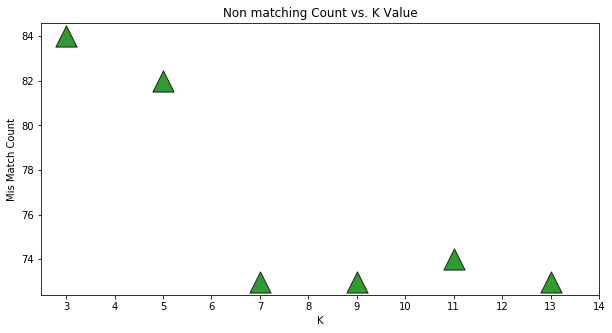

In [103]:
fig = plt.figure(figsize = (10,5))

plt.scatter(k_value, miss_match_count,  marker = '^' ,
            edgecolors= 'black' , 
            color = 'green', # Face Color
            s = 450 , # size
            alpha = .8 )

plt.title('Non matching Count vs. K Value')
plt.xlabel('K')


plt.ylabel('Mis Match Count');
plt.xticks(range(3,15))
print(miss_match_count) 